This notebook will hopefully contain timeseries that plot continuous data from moorings alongside model output For all depths. For now, it is focussing on just plotting model output for all depths. 

In [1]:
import sys
sys.path.append('/ocean/kflanaga/MEOPAR/analysis-keegan/notebooks/Tools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import math
import pickle
import cmocean
import json
import Keegan_eval_tools as ket
from collections import OrderedDict
from matplotlib.colors import LogNorm

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

In [3]:
saveloc='/ocean/kflanaga/MEOPAR/ptrc_extractions'
dataloc='/ocean/kflanaga/MEOPAR/ORCAData'
PATH='/results2/SalishSea/nowcast-green.201905/'
year=2019
Mooring='Hoodsport'

In [58]:
def hovmoeller(variable, depth, dates_list, depth_range, title='',var_title=''):
    depth_min, depth_max = depth_range
    var_min, var_max= variable.min(), variable.max()
    fig, ax = plt.subplots(1,1, figsize=(12,6))

    # Plot temperature contours
    CB = ax.contourf(dates_list, depth, np.transpose(variable),
                        vmin=var_min, vmax=var_max)
    ax.contour(dates_list, depth, np.transpose(variable), colors='w', linewidths=0.5,
               vmin=var_min, vmax=var_max)

    #Once you have the data from a whole year these should be used to divide seasons. 
    #ax.axvline(x=dt.datetime(2017,8,1), linestyle='-', linewidth=2.0, c='w')
    #ax.axvline(x=dt.datetime(2018,8,1), linestyle='-', linewidth=2.0, c='w')
    #ax.axvline(x=dt.datetime(2019,8,1), linestyle='-', linewidth=2.0, c='w')

    # Settings
    ax.set_title(title)
    ax.invert_yaxis()
    ax.set_xlabel('Date')
    ax.set_ylabel('Depth [m]')
    ax.set_ylim(depth_max,depth_min)
    yearsFmt = mdates.DateFormatter('%d %b')
    ax.xaxis.set_major_formatter(yearsFmt)
    plt.tight_layout()
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    
    # Colorbar:
    cbar_ax = fig.add_axes([1, 0.35, 0.02, 0.52])
    cbar    = fig.colorbar(CB, cax=cbar_ax, ticks=np.linspace(var_min,var_max,8))
    cbar.set_label(var_title)
    
    return

In [5]:
##### Loading in pickle file data
with open(os.path.join(dataloc,f'daily_data_{Mooring}.pkl'),'rb') as hh:
    data=pickle.load(hh)

In [6]:
bio=xr.open_mfdataset(saveloc+'/ts_HC201905_2015_Hoodsport.nc')

In [7]:
%%time
tt=np.array(bio.time_counter)
mod_depth=np.array(bio.deptht)
mod_nitrate=(bio.nitrate.isel(y=0,x=0))
#diatom=bio.diatoms.isel(deptht=ik,y=0,x=0)
#flagellate=bio.flagellates.isel(deptht=ik,y=0,x=0)
#ciliate=bio.ciliates.isel(deptht=ik,y=0,x=0)
#mod_Chl=(diatom+flagellate+ciliate)*1.8

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.69 ms


Wait, can I do this with three 1d arrays rather than 1 2d array? 

In [8]:
nitrate = (np.array(mod_nitrate))
nitrate = np.ma.masked_equal(nitrate,0)
#consider using nitrate.compressed() to get rid of the 0 values entirely instead of masking them. 
#also, when dealing with the observed data see if you can mask NAs 

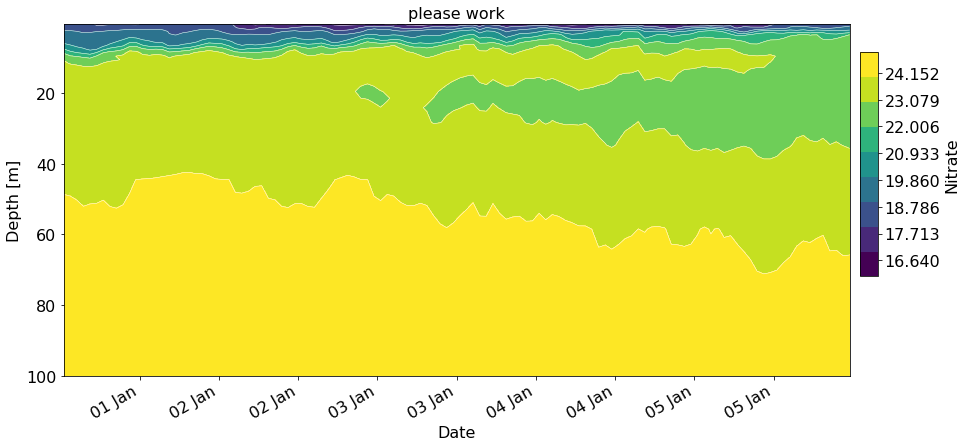

In [66]:
hovmoeller(nitrate, mod_depth, tt, (0.5,100), title='Nitrate test series',var_title='Nitrate')

Hmm. It is clear to me that the automatic stuff here does not work so good for the ranges considering the fact that all of the nitrate values go to 0 after a certain depth. Why do they suddenly become zero anyway?

In [17]:
bio.close()